In [40]:
import numpy as np 
import sys 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import time
import random
import os 
from matplotlib import colors as mcolors


## Loading the data

In [118]:
unsortdata =  np.loadtxt("/home/taranto/Documents/dmf2rg_simple/data/tpri_0.080/rawdata_phasediag.dat",comments="#")  
data = np.array( [ unsortdata[i] for i in np.lexsort((-unsortdata[:,0], unsortdata[:,4], unsortdata [:,3], unsortdata[:,-1]) ) ] ) 
tpri   = sorted(set(data[:,3]))
occs   = sorted(set(data[:,4]))
top    = np.array([data[(data[:,4]== n) & (data[:,-1]==0.)][-1] for n in occs])
bottom = np.array([data[(data[:,4]== n) & (data[:,-1]==1.)][-1] for n in occs])
top    = top[np.argsort(top[:,4])] 
bottom = bottom[np.argsort(bottom[:,4])]

## Initialize figure and instability vectors

In [119]:
#create an instance of the figure 
#plt.style.use("fivethirtyeight")
#plt.rcParams.update(plt.rcParamsDefault)

fig = plt.figure(facecolor ='w') 
#ax = fig.add_subplot(111)
#possible instability vectors 
def getvec(arr): 
    vectors    = np.vstack({tuple(row) for row in np.array([[a[6],a[7],a[5]] for a in arr])})
    wh = [np.where((arr[:,6]==v[0]) & (arr[:,7]==v[1])) for v in vectors]
    span = np.array([[np.min(arr[w,4]),np.max(arr[w,4])] for w in wh])
    vectors = vectors[np.argsort(span[:,0])]
    span = span[np.argsort(span[:,0])]
    rec = [1.-span[0][0]]
    for i in range(span.shape[0]-1): rec.append(1.-(span[i][1]+span[i+1][0])/2.)
    rec.append(1.-span[-1][1])
    return vectors, span , rec
vectorsb,spanb, recb = getvec(bottom)
vectorst,spant, rect = getvec(top)
print top.shape
for t in bottom:
    print t[4:9]  
for t in top : 
    print t[4:9]

(16, 15)
[   0.6           0.            3.14159265    2.0106193   101.73447692]
[   0.625         0.            3.14159265    2.0106193   104.33213456]
[   0.65          0.            3.14159265    2.0106193   104.62086355]
[   0.675         0.            3.14159265    2.0106193   114.08737109]
[   0.7           0.            3.14159265    2.0106193   106.25629174]
[   0.725         0.            3.14159265    2.0106193   108.75776516]
[   0.75          0.            3.14159265    2.0106193   121.66338171]
[   0.775         0.            3.14159265    2.63893783  121.82220147]
[   0.8           0.            3.14159265    2.63893783  111.61118564]
[   0.825         0.            3.14159265    2.63893783  118.53994242]
[   0.85          0.            3.14159265    2.63893783  111.17479947]
[   0.875         0.            3.14159265    2.63893783  107.86440743]
[   0.9           0.            3.14159265    2.63893783  115.73418692]
[   0.925         0.            3.10478661    3.0527349

In [110]:
Blues = plt.get_cmap('Blues')
Greens= plt.get_cmap('Greens')
def asscol(arr,vectors,cmap): 
    colmap  = plt.get_cmap(cmap)
    offs    = 0.1 
    def dpp(a,b): 
        return np.sqrt((a-np.pi)**2.+(b-np.pi)**2)
    M=np.max([dpp(v[0],v[1]) for v in vectors[vectors[:,-1]==0.]])
    m=np.min([dpp(v[0],v[1]) for v in vectors[vectors[:,-1]==0.]])
    d = [ dpp(v[0],v[1])*(1.-offs)/(M-m)for v in vectors] # how much each vector is close to pi,pi
    colspan = [colmap(d[i]) if vectors[i,-1]==0. else matplotlib.colors.to_rgb("black")  for i in range(vectors.shape[0])] 
    def cond(i,j): 
        return (arr[i][6]==vectors[j][0]) & (arr[i][7]==vectors[j][1]) & (arr[i,5] == vectors[j][2])
    return [ [colspan[j] for j in range(vectors.shape[0]) if cond(i,j)][0]   for i in range(arr.shape[0])]    
def marks(arr): 
    return  ['o' if a[5]==0 else '*' for a in arr ]
#asscol(top,vectorst,'Blues')

[(0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.031372549019607843, 0.2897347174163783, 0.570319108035371, 1.0),
 (0.031372549019607843, 0.2897347174163783, 0.570319108035371, 1.0),
 (0.031372549019607843, 0.2897347174163783, 0.570319108035371, 1.0),
 (0.031372549019607843, 0.2897347174163783, 0.570319108035371, 1.0),
 (0.031372549019607843, 0.2897347174163783, 0.570319108035371, 1.0),
 (0.031372549019607843, 0.2897347174163783, 0.570319108035371, 1.0),
 (0.031372549019607843, 0.2897347174163783, 0.570319108035371, 1.0),
 (0.57960784313725489, 0.7701960784313725, 0.87372549019607837, 1.0),
 (0.96862745098039216, 0.98431372549019602, 1.0, 1.0),
 (0.96862745098039216, 0.98431372549019602, 1.0, 1.0),
 (0.57960784313725489, 0.7701960784313725, 0.87372549019607837, 1.0),
 (0.57960784313725489, 0.7701960784313725, 0.87372549019607837, 1.0),
 (0.57960784313725489, 0.7701960784313725, 0.87372549019607837, 1.0),
 (0.57960784313725489, 0.7701960784313725, 0.87372549019607837, 1.0)]

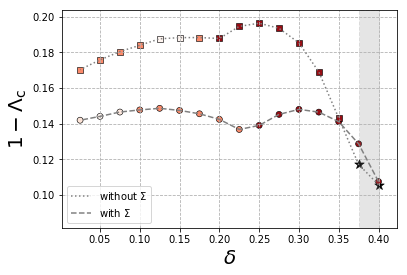

In [130]:
def form(a): 
    return "{:3.2f}".format(a)

ax = fig.add_subplot(111)
lcol=np.array(asscol(top,vectorst,'Reds'))[top[:,5]==0.]

if np.sum([1. for v in top[top[:,5]==1.]])>0.5 :     
    plt.axvspan(1.-np.min(top[top[:,5]==1,4]),1.-np.max(top[top[:,5]==1,4]),linestyle ='dashed',color = 'grey',alpha=0.2)
    plt.scatter(1.-top[top[:,5]==1.,4],top[top[:,5]==1.,0],c='black', s = 100.0, marker='*', edgecolor='black', linewidth='0.6')#,label =r'without $\Sigma$')

plt.plot(1.-top[:,4],top[:,0],color='grey',linestyle='dotted',label =r'without $\Sigma$')
plt.plot(1.-bottom[:,4],bottom[:,0],color='grey',linestyle ='dashed', label = r'with $\Sigma$')
plt.scatter(1.-bottom[:,4],bottom[:,0],c=asscol(bottom,vectorsb,'Reds'),marker='o',edgecolor='black', linewidth='0.6')# label = r'with $\Sigma$')
plt.scatter(1.-top[top[:,5]==0,4],top[top[:,5]==0,0],c=lcol, marker='s',edgecolor='black', linewidth='0.6')#,label =r'without $\Sigma$')


rectangles = False
if rectangles : 
    for i in range(1,vectorsb.shape[0]-1): 
        #lab = r'('+form(vectorsb[i][0])+r','+form(vectorsb[i][1])+r')'
        ax.axvspan(recb[i],recb[i+1],alpha=0.5,fill=False, linestyle = 'dashed')# color = colorsb[i],label=lab) 
    for i in range(1,vectorst.shape[0]-1):
        ax.axvspan(rect[i],rect[i+1],alpha=0.5,fill=False, linestyle = 'dotted')
plt.grid(linestyle='dashed')
plt.legend()
plt.xlabel(r"$\delta$",fontsize=20)
plt.ylabel(r"$1-\Lambda_{\mathrm{c}}$",fontsize=20)
plt.savefig('/home/taranto/Documents/dmf2rg_simple/data/tpri_0.085/jup_phase_diagram.png') 
#os.system('geequie /home/taranto/Documents/dmf2rg_simple/data/tpri_0.085/jup_phase_diagram.png &')